In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import yeojohnson
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
# Load datasets
df1 = pd.read_csv('cleaned_dataset1.csv')
df2 = pd.read_csv('cleaned_dataset2.csv')

In [3]:
df1 # Display df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,calc_hours_after_sunset,time_valid
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.87,0,1.87,True
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.10,0,3.10,True
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.11,0,3.10,True
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.13,0,3.12,True
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.15,0,3.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2018-05-04 03:20:00,4.000000,rat,2018-05-04 03:20:00,2018-05-04 03:21:00,23,1,0,5,2018-05-03 19:22:00,7.98,1,7.97,True
601,2018-05-04 04:18:00,2.000000,rat,2018-05-04 04:14:00,2018-05-04 04:30:00,224,1,0,5,2018-05-03 19:22:00,8.93,1,8.93,True
602,2018-05-04 04:18:00,1.000000,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.95,1,8.93,True
603,2018-05-04 04:19:00,22.000000,pick,2018-05-04 04:14:00,2018-05-04 04:30:00,310,0,1,5,2018-05-03 19:22:00,8.96,1,8.95,True


In [4]:
df2 # Display df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
0,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
1,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
2,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
3,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
4,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
1906,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
1907,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
1908,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
1909,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [5]:
df1.info() # Print the summary of df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 605 non-null    object 
 1   bat_landing_to_food        605 non-null    float64
 2   habit                      605 non-null    object 
 3   rat_period_start           605 non-null    object 
 4   rat_period_end             605 non-null    object 
 5   seconds_after_rat_arrival  605 non-null    int64  
 6   risk                       605 non-null    int64  
 7   reward                     605 non-null    int64  
 8   month                      605 non-null    int64  
 9   sunset_time                605 non-null    object 
 10  hours_after_sunset         605 non-null    float64
 11  season                     605 non-null    int64  
 12  calc_hours_after_sunset    605 non-null    float64
 13  time_valid                 605 non-null    bool   

In [6]:
df2.info() # Print the summary of df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1911 non-null   object 
 1   month               1911 non-null   int64  
 2   hours_after_sunset  1911 non-null   float64
 3   bat_landing_number  1911 non-null   int64  
 4   food_availability   1911 non-null   float64
 5   rat_minutes         1911 non-null   float64
 6   rat_arrival_number  1911 non-null   int64  
 7   rat_present         1911 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 119.6+ KB


In [7]:
df1.isnull().sum() # Count missing values in each column of df1

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
calc_hours_after_sunset      0
time_valid                   0
dtype: int64

In [8]:
df2.isnull().sum() # Count missing values in each column of df2

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
rat_present           0
dtype: int64

In [9]:
# Convert time-related columns to datetime format of df1
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['rat_period_start'] = pd.to_datetime(df1['rat_period_start'])
df1['rat_period_end'] = pd.to_datetime(df1['rat_period_end'])
df1['sunset_time'] = pd.to_datetime(df1['sunset_time'])
# Convert numeric columns to proper number format of df1
df1['bat_landing_to_food'] = pd.to_numeric(df1['bat_landing_to_food'])
df1['seconds_after_rat_arrival'] = pd.to_numeric(df1['seconds_after_rat_arrival'])
df1['hours_after_sunset'] = pd.to_numeric(df1['hours_after_sunset'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 605 non-null    datetime64[ns]
 1   bat_landing_to_food        605 non-null    float64       
 2   habit                      605 non-null    object        
 3   rat_period_start           605 non-null    datetime64[ns]
 4   rat_period_end             605 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  605 non-null    int64         
 6   risk                       605 non-null    int64         
 7   reward                     605 non-null    int64         
 8   month                      605 non-null    int64         
 9   sunset_time                605 non-null    datetime64[ns]
 10  hours_after_sunset         605 non-null    float64       
 11  season                     605 non-null    int64         
 12  calc_hou

In [10]:
# Convert time-related columns to datetime format of df2.
df2['time'] = pd.to_datetime(df2['time'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1911 non-null   datetime64[ns]
 1   month               1911 non-null   int64         
 2   hours_after_sunset  1911 non-null   float64       
 3   bat_landing_number  1911 non-null   int64         
 4   food_availability   1911 non-null   float64       
 5   rat_minutes         1911 non-null   float64       
 6   rat_arrival_number  1911 non-null   int64         
 7   rat_present         1911 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 119.6 KB


In [11]:
# Count duplicate rows from df1
df1.duplicated().sum() 

np.int64(0)

In [12]:
# Count duplicate rows from df2
df2.duplicated().sum()

np.int64(0)

In [14]:
# Simple LR: Predict 'reward' from 'seconds_after_rat_arrival'
X_simple = df1[['seconds_after_rat_arrival']]
y_simple = df1['reward']

# Train/test split (70/30)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.3, random_state=42)

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Predict
y_pred_s = model_simple.predict(X_test_s)

# Evaluate
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
nrmse_s = rmse_s / (y_test_s.max() - y_test_s.min()) if y_test_s.max() != y_test_s.min() else 0

print(f"Simple LR - MAE: {mae_s:.3f}, MSE: {mse_s:.3f}, RMSE: {rmse_s:.3f}, NRMSE: {nrmse_s:.3f}")

# Coefficients
print(f"Intercept (b0): {model_simple.intercept_:.3f}, Coefficient (b1): {model_simple.coef_[0]:.3f}")

Simple LR - MAE: 0.463, MSE: 0.230, RMSE: 0.480, NRMSE: 0.480
Intercept (b0): 0.640, Coefficient (b1): -0.000


In [15]:
# Merge datasets by rounding times to the nearest 30 minutes
df1['time_rounded'] = df1['start_time'].dt.floor('30min')
df2['time_rounded'] = df2['time'].dt.floor('30min')
df_merged = pd.merge(df1, df2, on='time_rounded', suffixes=('_bat', '_interval'), how='left')
df_merged = df_merged.drop(columns=['time_rounded'])  # Clean up extra column

# Calculate how long rats were present
df_merged['rat_presence_duration'] = (df_merged['rat_period_end'] - df_merged['rat_period_start']).dt.total_seconds()
# Calculate rate of rat encounters per bat landing
df_merged['rat_encounter_rate'] = df_merged['rat_arrival_number'] / df_merged['bat_landing_number'].replace(0, np.nan)
# Add a squared term for non-linear time effect
df_merged['time_since_sunset_adjusted'] = df_merged['hours_after_sunset_bat'] ** 2

# List of 12 variables to use as predictors
explanatory_vars = [
    'seconds_after_rat_arrival', 'hours_after_sunset_bat', 'season', 'risk', 'month_bat',
    'rat_arrival_number', 'bat_landing_number', 'food_availability', 'rat_presence_duration',
    'rat_encounter_rate', 'time_since_sunset_adjusted', 'rat_minutes'
]

# Set predictors (X) and response (y) with missing values set to 0
X = df_merged[explanatory_vars].fillna(0)
y = df_merged['bat_landing_to_food'].fillna(0)

In [16]:
# Transform foraging time to log scale to handle skewness
y_log = np.log1p(y)  # log(1 + y) for non-negative values

# Remove outliers using the interquartile range (IQR) method
Q1 = y_log.quantile(0.25)
Q3 = y_log.quantile(0.75)
IQR = Q3 - Q1
mask = (y_log >= (Q1 - 1.5 * IQR)) & (y_log <= (Q3 + 1.5 * IQR))
X = X[mask]
y_log = y_log[mask]

# Calculate Variance Inflation Factor (VIF) to check for overlapping variables
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_data = calculate_vif(X)
high_vif = vif_data[vif_data['VIF'] > 5]['variables'].tolist()
X = X.drop(columns=high_vif)  # Remove variables with VIF > 5

# Transform continuous variables to a normal shape using Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=False)
continuous_cols = X.select_dtypes(include=np.number).columns
X[continuous_cols] = pt.fit_transform(X[continuous_cols])

# Scale all predictor variables to the same range
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Multiple LR - MAE: 0.822, MSE: 1.041, RMSE: 1.020, NRMSE: 0.248, R2: 0.015, Adjusted R2: -0.013
                     Feature  Coefficient
0  seconds_after_rat_arrival     0.133888
1                       risk     0.164577
2         rat_arrival_number    -0.142993
3         rat_encounter_rate     0.005901
4                rat_minutes     0.121739


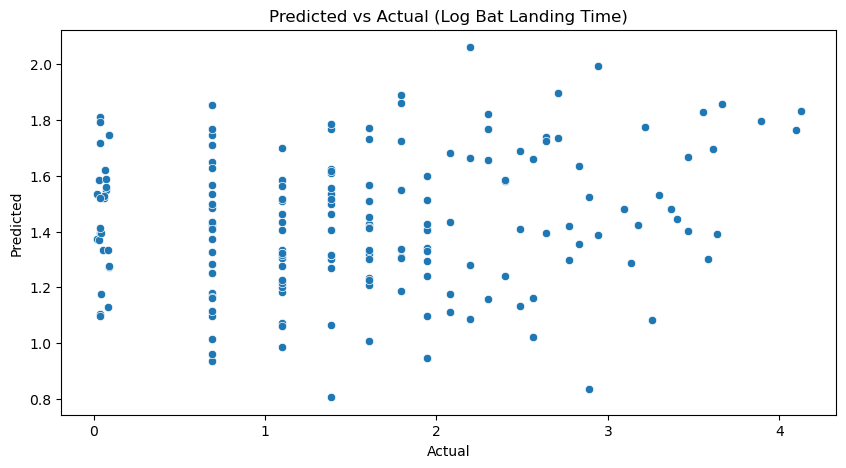

In [17]:
# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.3, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to predict on the test set
y_pred = model.predict(X_test)

# Calculate error metrics including R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
nrmse = rmse / (y_test.max() - y_test.min()) if y_test.max() != y_test.min() else 0
r2 = model.score(X_test, y_test)
n, p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print all metrics
print(f"Multiple LR - MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, NRMSE: {nrmse:.3f}, R2: {r2:.3f}, Adjusted R2: {adjusted_r2:.3f}")

# Show the coefficients for each variable
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

# Create a scatter plot to compare predicted vs. actual values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs Actual (Log Bat Landing Time)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Winter LR - MAE: 0.915, MSE: 1.275, RMSE: 1.129, NRMSE: 0.329, R2: -0.128, Adjusted R2: -0.304
              Feature  Winter_Coefficient
0              season            0.000000
1                risk            0.216546
2  rat_arrival_number           -0.129770
3  rat_encounter_rate            0.025889
4         rat_minutes            0.242680
Spring LR - MAE: 0.743, MSE: 0.864, RMSE: 0.929, NRMSE: 0.240, R2: 0.102, Adjusted R2: 0.042
                     Feature  Spring_Coefficient
0  seconds_after_rat_arrival            0.169547
1                       risk            0.159467
2                  month_bat            0.131769
3         rat_arrival_number           -0.030591
4         bat_landing_number            0.028249
5          food_availability           -0.046295
6      rat_presence_duration           -0.123426
7         rat_encounter_rate           -0.032144
8                rat_minutes            0.054533
Coefficient Comparison (Spring - Winter):
                     Feature

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


<Figure size 1200x600 with 0 Axes>

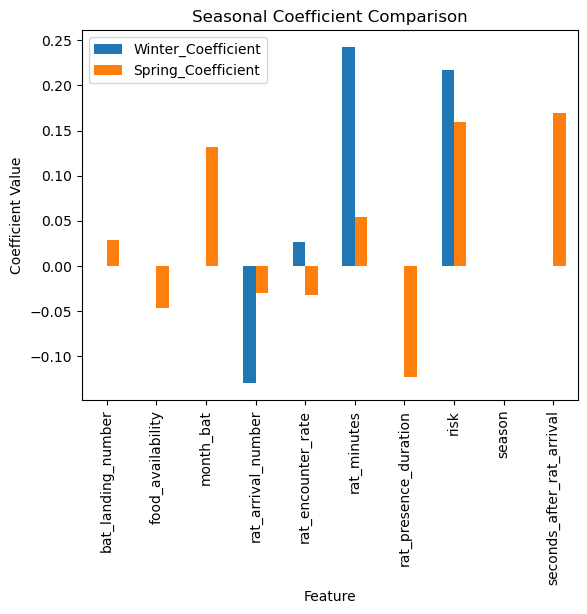

In [19]:
# Split data into winter and spring
df_winter = df_merged[df_merged['season'] == 0]  # Get winter data
df_spring = df_merged[df_merged['season'] == 1]  # Get spring data

# Winter model prep
X_winter = df_winter[explanatory_vars].fillna(0)  # Pick factors
y_winter = df_winter['bat_landing_to_food'].fillna(0)  # Pick foraging time
y_winter_log = np.log1p(y_winter)  # Change to log scale

Q1_w = y_winter_log.quantile(0.25)  # 25% point
Q3_w = y_winter_log.quantile(0.75)  # 75% point
IQR_w = Q3_w - Q1_w  # Middle range
mask_w = (y_winter_log >= (Q1_w - 1.5 * IQR_w)) & (y_winter_log <= (Q3_w + 1.5 * IQR_w))  # Keep normal values
X_winter = X_winter[mask_w]  # Apply to factors
y_winter_log = y_winter_log[mask_w]  # Apply to foraging time

vif_data_w = calculate_vif(X_winter)  # Check overlaps
high_vif_w = vif_data_w[vif_data_w['VIF'] > 5]['variables'].tolist()  # Find big overlaps
X_winter = X_winter.drop(columns=high_vif_w)  # Remove overlaps

pt_w = PowerTransformer(method='yeo-johnson', standardize=False)  # Fix data shape
continuous_cols_w = X_winter.select_dtypes(include=np.number).columns  # Get number columns
X_winter[continuous_cols_w] = pt_w.fit_transform(X_winter[continuous_cols_w])  # Apply shape fix

scaler_w = StandardScaler()  # Balance number sizes
X_winter_scaled = pd.DataFrame(scaler_w.fit_transform(X_winter), columns=X_winter.columns)  # Apply balance

# Train winter model
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_winter_scaled, y_winter_log, test_size=0.3, random_state=42)  # Split data
model_winter = LinearRegression()  # Create model
model_winter.fit(X_train_w, y_train_w)  # Train model
y_pred_w = model_winter.predict(X_test_w)  # Predict

# Check winter results
mae_w = mean_absolute_error(y_test_w, y_pred_w)  # Average error
mse_w = mean_squared_error(y_test_w, y_pred_w)  # Squared error
rmse_w = np.sqrt(mse_w)  # Square root error
nrmse_w = rmse_w / (y_test_w.max() - y_test_w.min()) if y_test_w.max() != y_test_w.min() else 0  # Error percentage
r2_w = model_winter.score(X_test_w, y_test_w)  # How much it explains
n_w, p_w = X_test_w.shape  # Get test size
adjusted_r2_w = 1 - (1 - r2_w) * (n_w - 1) / (n_w - p_w - 1)  # Adjusted explanation

print(f"Winter LR - MAE: {mae_w:.3f}, MSE: {mse_w:.3f}, RMSE: {rmse_w:.3f}, NRMSE: {nrmse_w:.3f}, R2: {r2_w:.3f}, Adjusted R2: {adjusted_r2_w:.3f}")  # Show results

coef_winter = pd.DataFrame({'Feature': X_winter.columns, 'Winter_Coefficient': model_winter.coef_})  # Show factor effects
print(coef_winter)

# Spring model prep
X_spring = df_spring[explanatory_vars].fillna(0)  # Pick factors
y_spring = df_spring['bat_landing_to_food'].fillna(0)  # Pick foraging time
y_spring_log = np.log1p(y_spring)  # Change to log scale

Q1_s = y_spring_log.quantile(0.25)  # 25% point
Q3_s = y_spring_log.quantile(0.75)  # 75% point
IQR_s = Q3_s - Q1_s  # Middle range
mask_s = (y_spring_log >= (Q1_s - 1.5 * IQR_s)) & (y_spring_log <= (Q3_s + 1.5 * IQR_s))  # Keep normal values
X_spring = X_spring[mask_s]  # Apply to factors
y_spring_log = y_spring_log[mask_s]  # Apply to foraging time

vif_data_s = calculate_vif(X_spring)  # Check overlaps
high_vif_s = vif_data_s[vif_data_s['VIF'] > 5]['variables'].tolist()  # Find big overlaps
X_spring = X_spring.drop(columns=high_vif_s)  # Remove overlaps

pt_s = PowerTransformer(method='yeo-johnson', standardize=False)  # Fix data shape
continuous_cols_s = X_spring.select_dtypes(include=np.number).columns  # Get number columns
X_spring[continuous_cols_s] = pt_s.fit_transform(X_spring[continuous_cols_s])  # Apply shape fix

scaler_s = StandardScaler()  # Balance number sizes
X_spring_scaled = pd.DataFrame(scaler_s.fit_transform(X_spring), columns=X_spring.columns)  # Apply balance

# Train spring model
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_spring_scaled, y_spring_log, test_size=0.3, random_state=42)  # Split data
model_spring = LinearRegression()  # Create model
model_spring.fit(X_train_s, y_train_s)  # Train model
y_pred_s = model_spring.predict(X_test_s)  # Predict

# Check spring results
mae_s = mean_absolute_error(y_test_s, y_pred_s)  # Average error
mse_s = mean_squared_error(y_test_s, y_pred_s)  # Squared error
rmse_s = np.sqrt(mse_s)  # Square root error
nrmse_s = rmse_s / (y_test_s.max() - y_test_s.min()) if y_test_s.max() != y_test_s.min() else 0  # Error percentage
r2_s = model_spring.score(X_test_s, y_test_s)  # How much it explains
n_s, p_s = X_test_s.shape  # Get test size
adjusted_r2_s = 1 - (1 - r2_s) * (n_s - 1) / (n_s - p_s - 1)  # Adjusted explanation

print(f"Spring LR - MAE: {mae_s:.3f}, MSE: {mse_s:.3f}, RMSE: {rmse_s:.3f}, NRMSE: {nrmse_s:.3f}, R2: {r2_s:.3f}, Adjusted R2: {adjusted_r2_s:.3f}")  # Show results

coef_spring = pd.DataFrame({'Feature': X_spring.columns, 'Spring_Coefficient': model_spring.coef_})  # Show factor effects
print(coef_spring)

# Compare seasons
coef_compare = pd.merge(coef_winter, coef_spring, on='Feature', how='outer').fillna(0)  # Combine factor effects
coef_compare['Difference'] = coef_compare['Spring_Coefficient'] - coef_compare['Winter_Coefficient']  # Find differences
print("Coefficient Comparison (Spring - Winter):")  # Label
print(coef_compare)  # Show table

# Draw chart
plt.figure(figsize=(12, 6))  # Set chart size
coef_compare.set_index('Feature')[['Winter_Coefficient', 'Spring_Coefficient']].plot(kind='bar')  # Bar chart of effects
plt.title('Seasonal Coefficient Comparison')  # Add title
plt.ylabel('Coefficient Value')  # Label y-axis
plt.show()  # Show chart

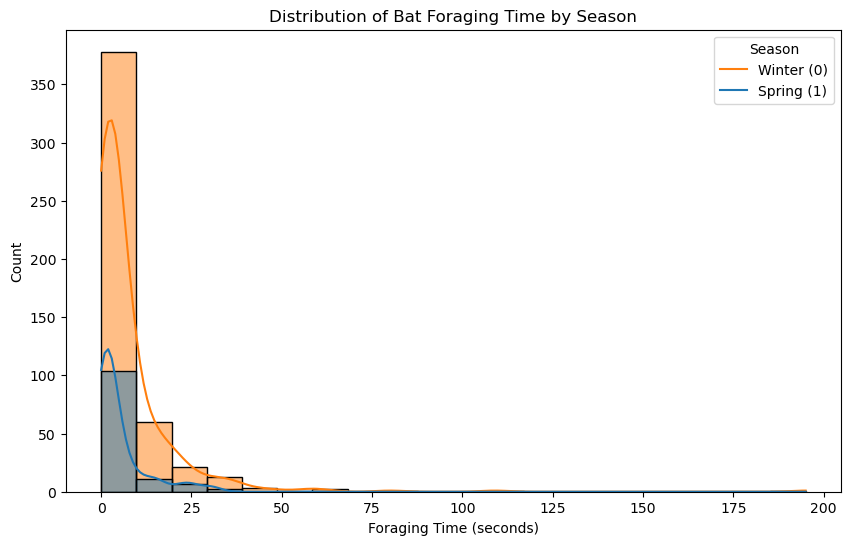

In [20]:
# Visualization 1: Histogram of Foraging Time (bat_landing_to_food) by Season
plt.figure(figsize=(10, 6))  # Set figure size for clarity
sns.histplot(data=df1, x='bat_landing_to_food', hue='season', kde=True, bins=20)  # Plot distribution, colored by season, with smooth curve
plt.title('Distribution of Bat Foraging Time by Season')  # Title for context
plt.xlabel('Foraging Time (seconds)')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.legend(title='Season', labels=['Winter (0)', 'Spring (1)'])  # Legend
plt.show()  # Display plot

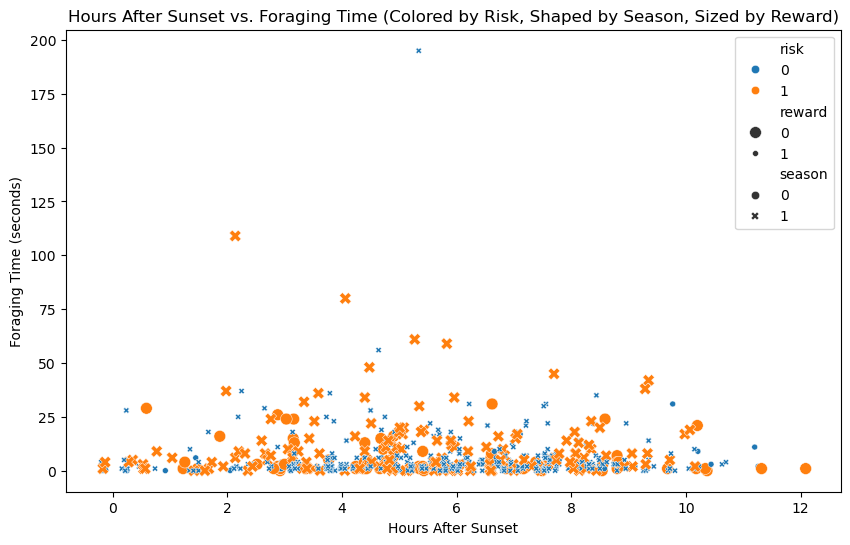

In [21]:
# Visualization 2: Scatter Plot of Hours After Sunset vs. Foraging Time, Colored by Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='hours_after_sunset', y='bat_landing_to_food', hue='risk', style='season', size='reward')  # Scatter with hue for risk, style for season, size for reward
plt.title('Hours After Sunset vs. Foraging Time (Colored by Risk, Shaped by Season, Sized by Reward)')
plt.xlabel('Hours After Sunset')
plt.ylabel('Foraging Time (seconds)')
plt.show()

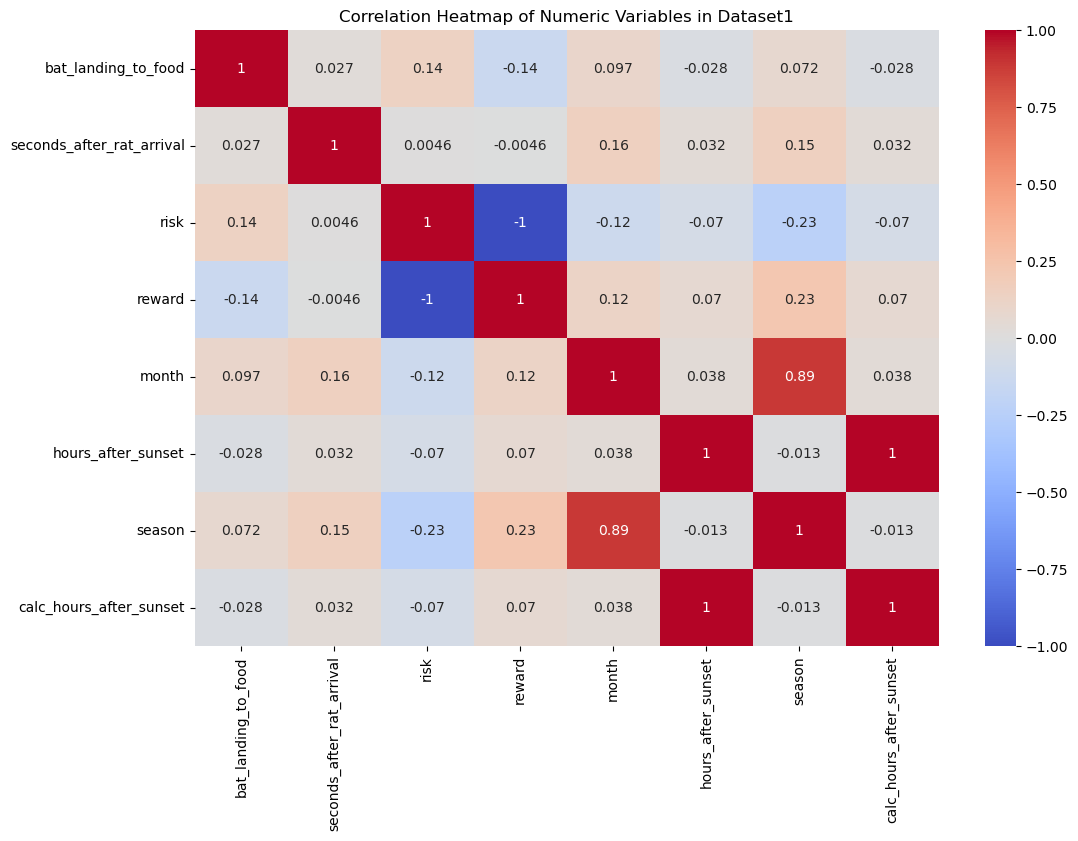

In [22]:
# Visualization 3: Correlation Heatmap for Numeric Variables in Dataset1
plt.figure(figsize=(12, 8))
corr_matrix = df1.select_dtypes(include='number').corr()  # Compute correlations for numeric columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # Heatmap with annotations, color range from -1 to 1
plt.title('Correlation Heatmap of Numeric Variables in Dataset1')
plt.show()

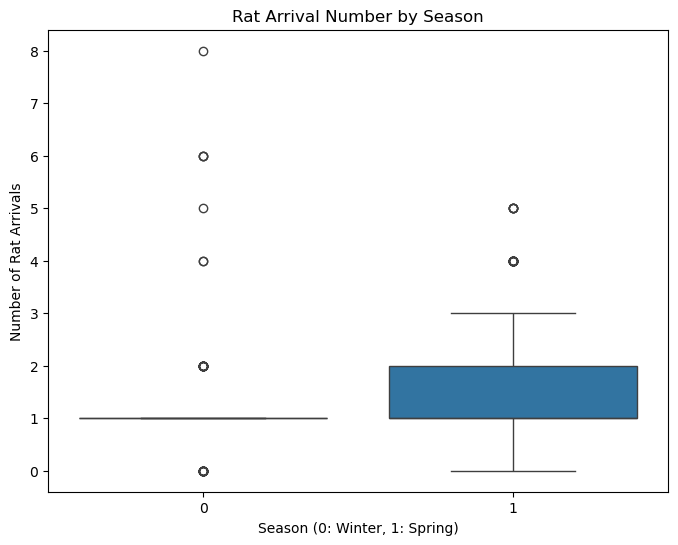

In [24]:
# Visualization 4: Boxplot of Rat Arrival Number by Season (from Merged Data)
# First, merge for this plot if not already done (assume df_merged from earlier)
df1['time_rounded'] = df1['start_time'].dt.floor('30min')
df2['time_rounded'] = df2['time'].dt.floor('30min')
df_merged_vis = pd.merge(df1, df2, on='time_rounded', how='left')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_merged_vis, x='season', y='rat_arrival_number')  # Boxplot to show distribution and outliers
plt.title('Rat Arrival Number by Season')
plt.xlabel('Season (0: Winter, 1: Spring)')
plt.ylabel('Number of Rat Arrivals')
plt.show()

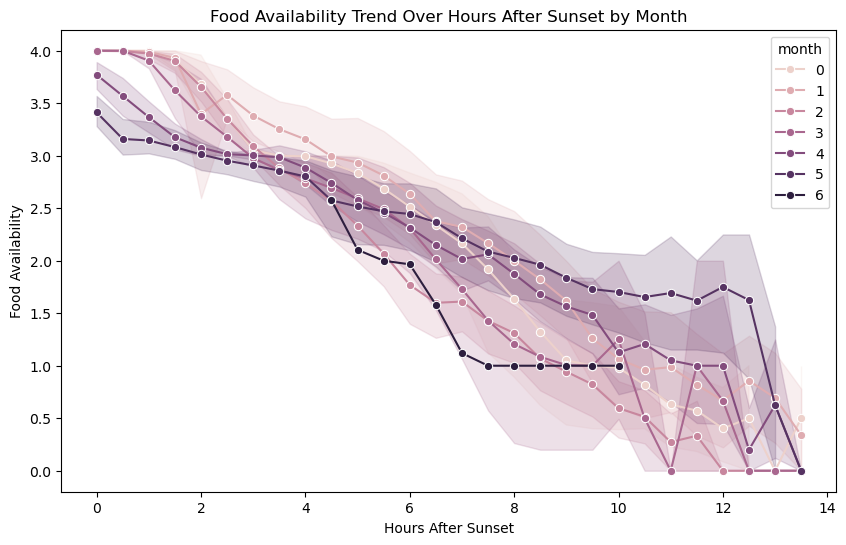

In [25]:
# Visualization 5: Line Plot of Food Availability Over Hours After Sunset (Dataset2)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='hours_after_sunset', y='food_availability', hue='month', marker='o')  # Line with markers, colored by month
plt.title('Food Availability Trend Over Hours After Sunset by Month')
plt.xlabel('Hours After Sunset')
plt.ylabel('Food Availability')
plt.show()

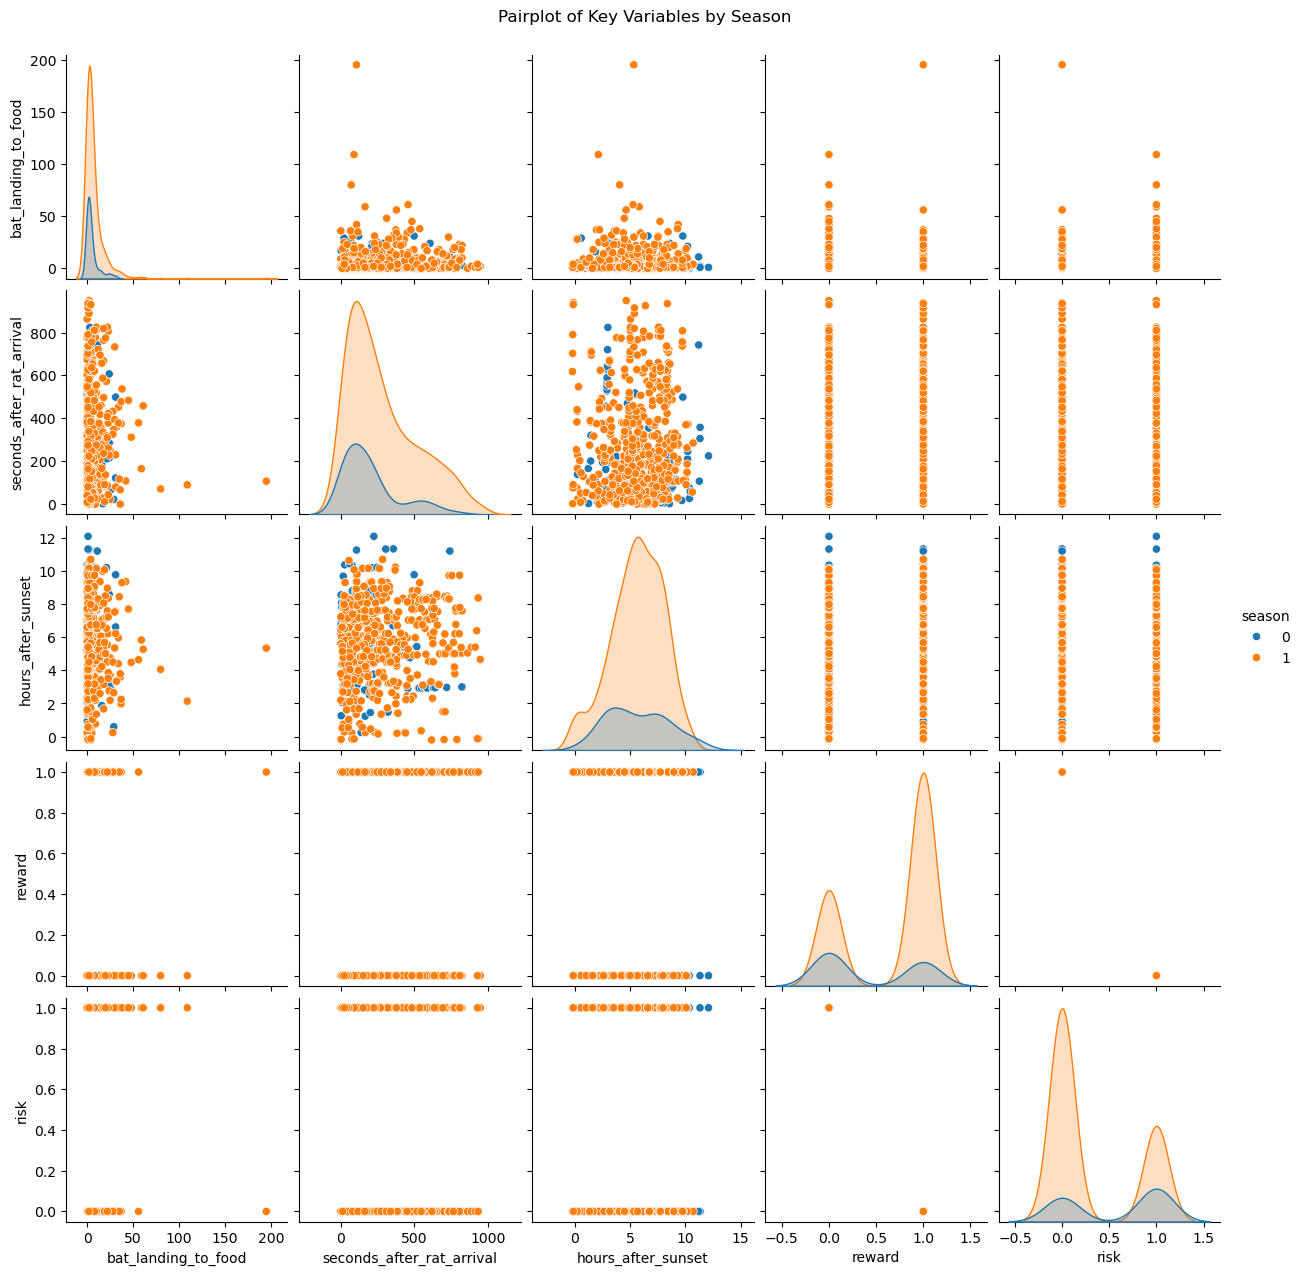

In [26]:
# Visualization 6: Pairplot for Key Variables to Check Relationships
key_vars = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset', 'reward', 'risk', 'season']
sns.pairplot(df1[key_vars], hue='season', diag_kind='kde')  # Grid of scatterplots and distributions, colored by season
plt.suptitle('Pairplot of Key Variables by Season', y=1.02)  # Title above
plt.show()